In [32]:
import os
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
import tensorflow as tf
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [33]:
weld_data=pd.read_csv('https://raw.githubusercontent.com/Ani-94/Wire_params/main/Weld_params_geometry.csv')
test = pd.read_csv('https://raw.githubusercontent.com/Ani-94/Wire_params/main/test.csv')

In [34]:
#Data preparation
df = weld_data.copy()
df = df.drop('Sl. No.',axis=1)

In [35]:
#Converting categorical features to numerical features
fre_enc=(df.groupby('Material').size())/len(df)
df['Material'] = df['Material'].apply(lambda x: fre_enc[x])

In [36]:
#Checking for interdrpendecy of features
df.corr()

,Material,Current (A),Voltage(V),Wire feed spped(m/min),Bead width(mm),Bead Height (mm),Bead Penetration(mm)
Material,1.000000,0.564450,-0.887829,0.202408,-0.081540,0.311091,0.040246
Current (A),0.564450,1.000000,-0.658097,0.105728,0.322389,0.605814,0.607983
Voltage(V),-0.887829,-0.658097,1.000000,-0.155933,0.034628,-0.246803,-0.272103
Wire feed spped(m/min),0.202408,0.105728,-0.155933,1.000000,0.145297,0.212787,0.281343
Bead width(mm),-0.081540,0.322389,0.034628,0.145297,1.000000,0.007262,0.590539
Bead Height (mm),0.311091,0.605814,-0.246803,0.212787,0.007262,1.000000,0.286711
Bead Penetration(mm),0.040246,0.607983,-0.272103,0.281343,0.590539,0.286711,1.000000


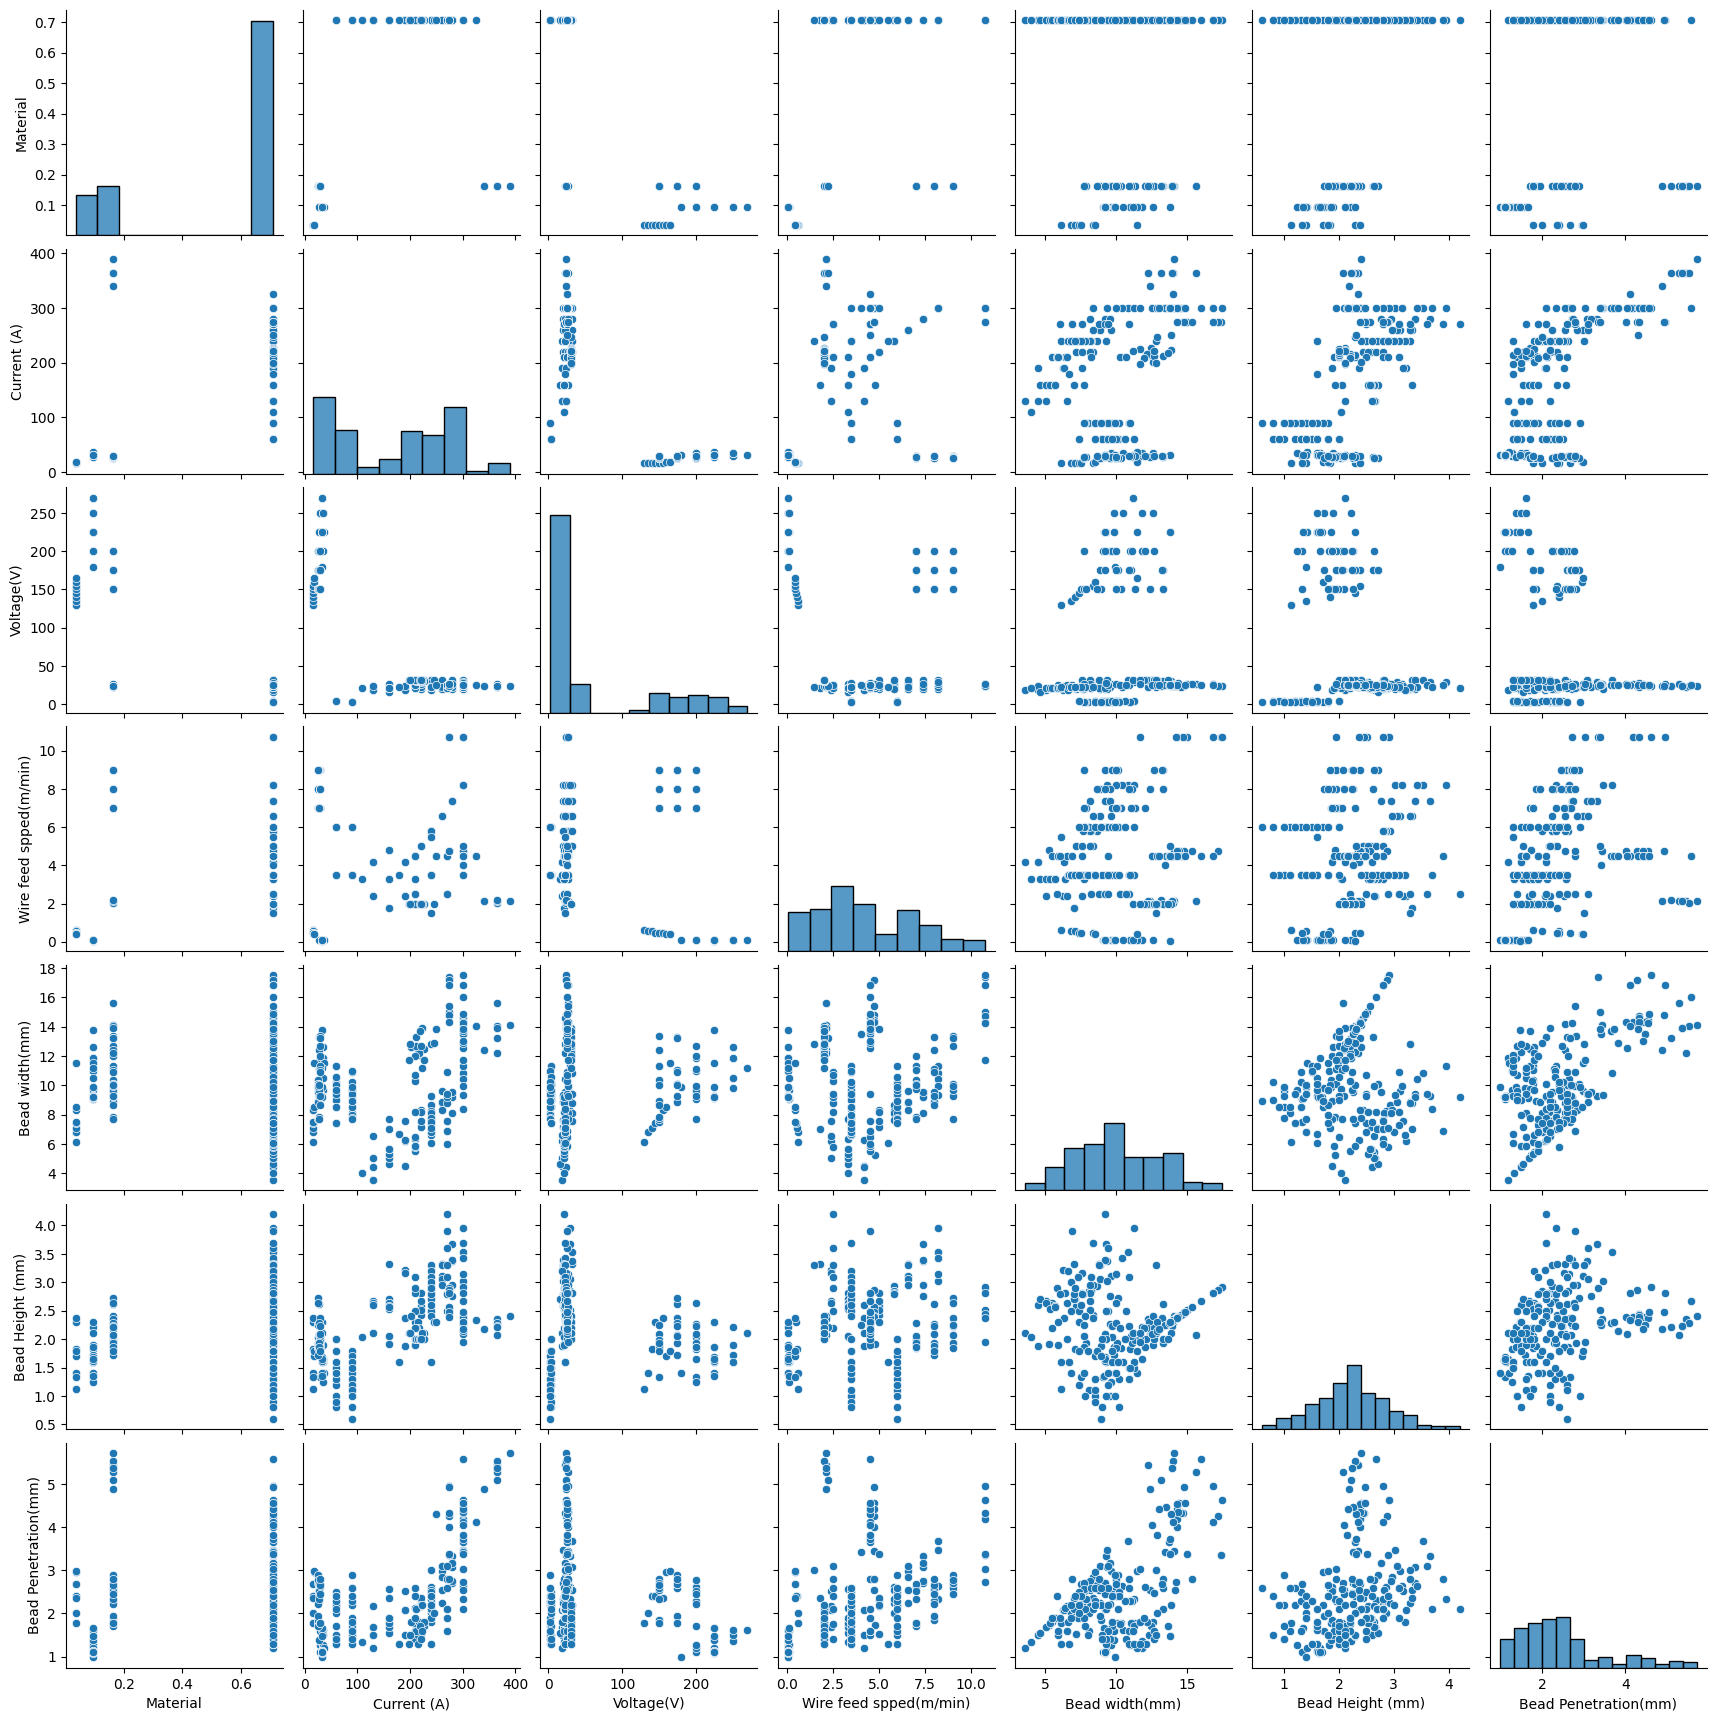

In [37]:
#Data visualisation
sns.pairplot(df)

<Axes: >

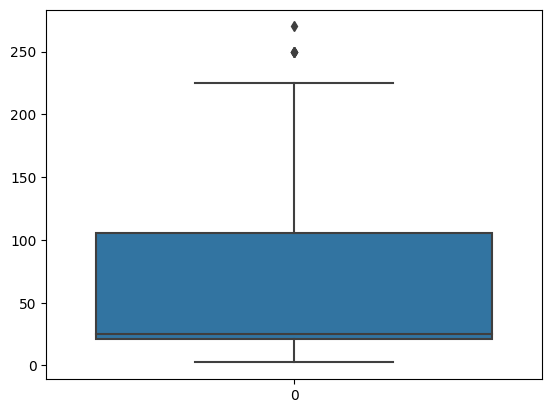

In [38]:
sns.boxplot(df['Voltage(V)'])

<Axes: >

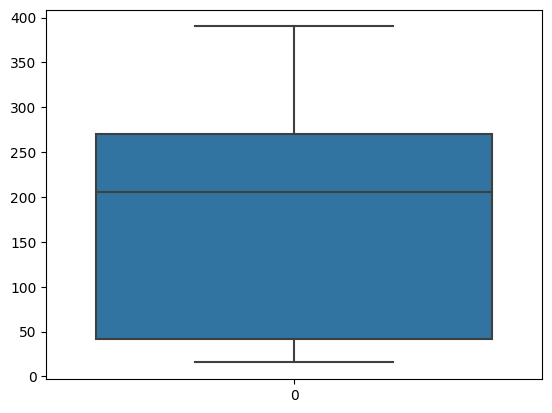

In [39]:
sns.boxplot(df['Current (A)'])

<Axes: >

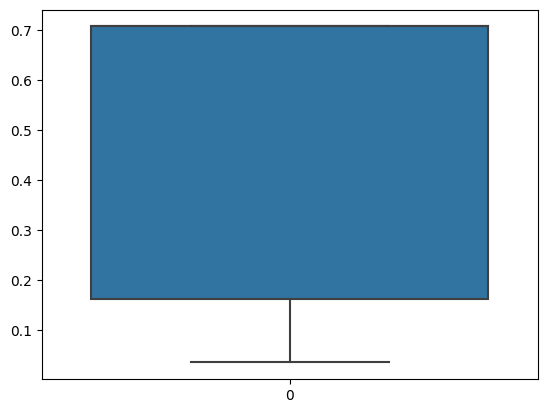

In [40]:
sns.boxplot(df['Material'])

<Axes: >

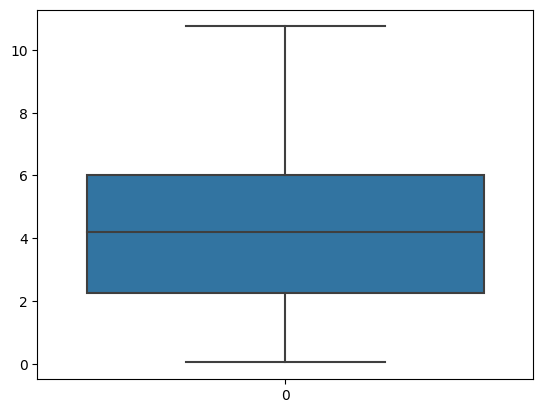

In [41]:
sns.boxplot(df['Wire feed spped(m/min)'])

<Axes: >

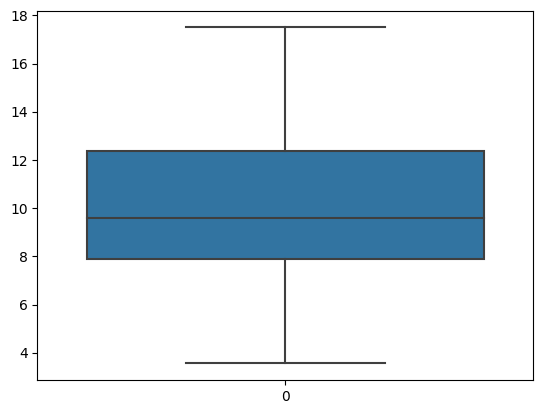

In [42]:
sns.boxplot(df['Bead width(mm)'])

<Axes: >

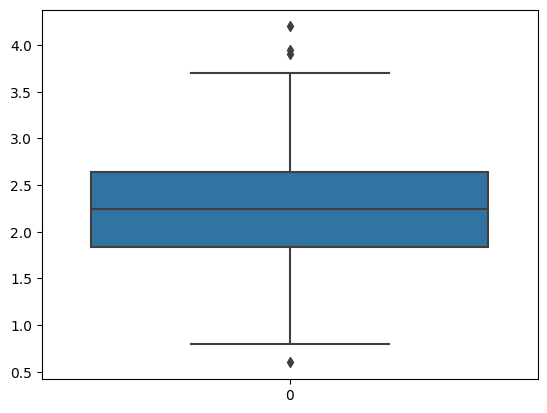

In [43]:
sns.boxplot(df['Bead Height (mm)'])

<Axes: >

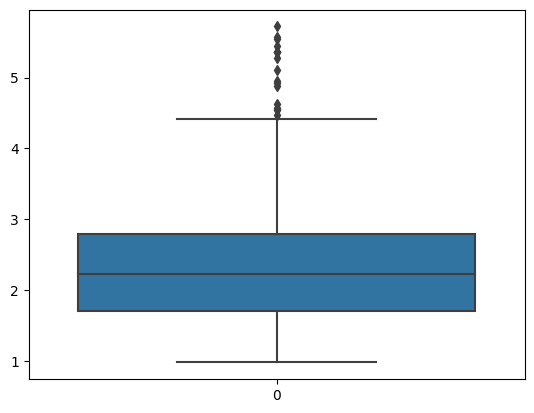

In [44]:
sns.boxplot(df['Bead Penetration(mm)'])

In [45]:
#Splitting the data
x = df.iloc[:,:-3]
y= df.iloc[:,-3:]

In [46]:
#Data standardisation
for i in x.columns:
  x[i] = (x[i]-x[i].min())/(x[i].max()-x[i].min())
  x[i] = (x[i]-x[i].mean())/x[i].std()

<ipython-input-46-ec12ef786ee6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[i] = (x[i]-x[i].min())/(x[i].max()-x[i].min())
<ipython-input-46-ec12ef786ee6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[i] = (x[i]-x[i].mean())/x[i].std()


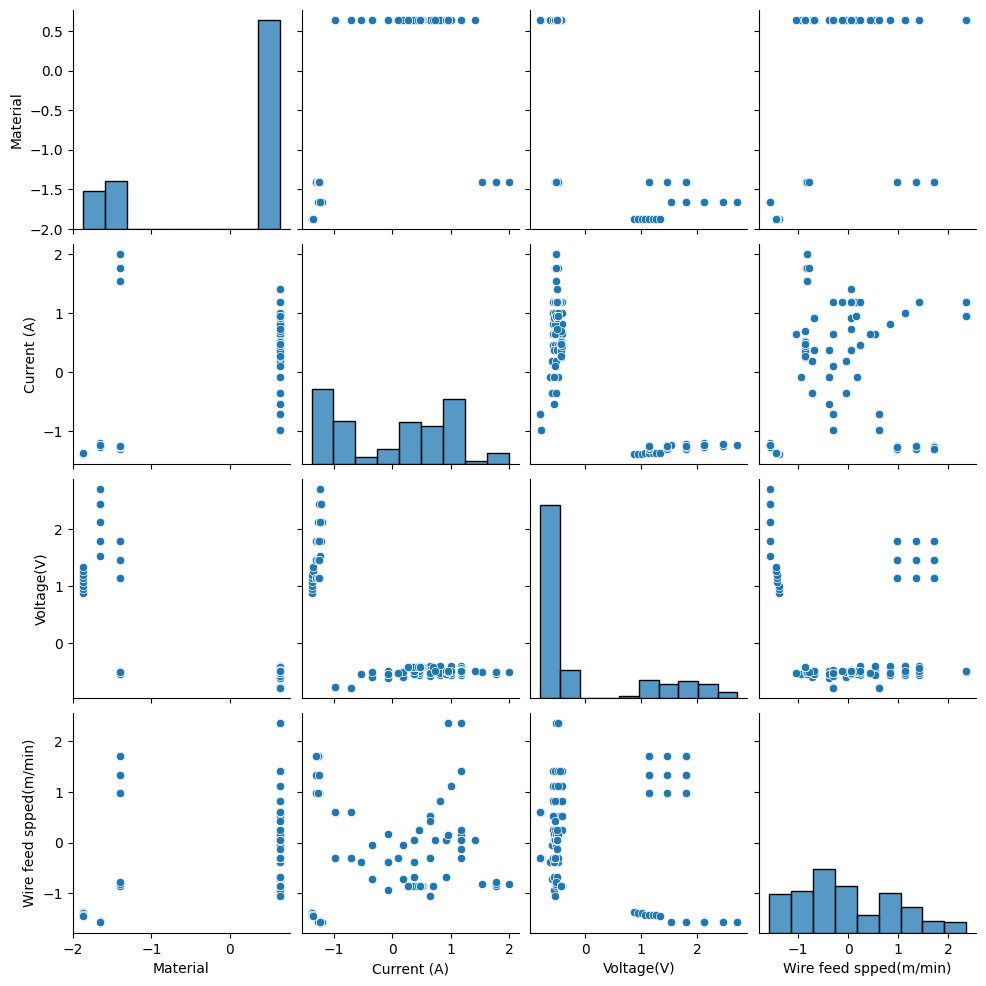

In [47]:
#Data visualisation
sns.pairplot(x)

<Axes: xlabel='Material', ylabel='Density'>

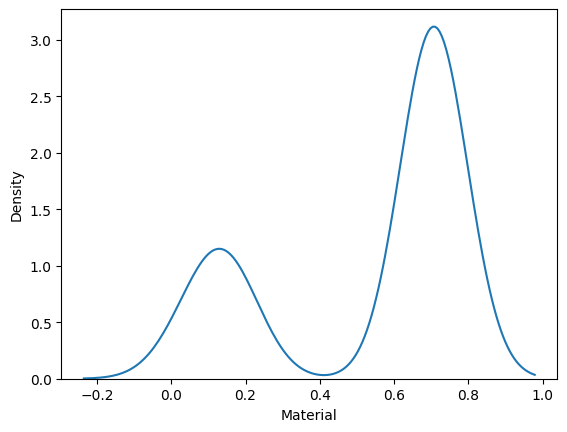

In [48]:
sns.kdeplot(data =df, x = 'Material')

<Axes: xlabel='Current (A)', ylabel='Density'>

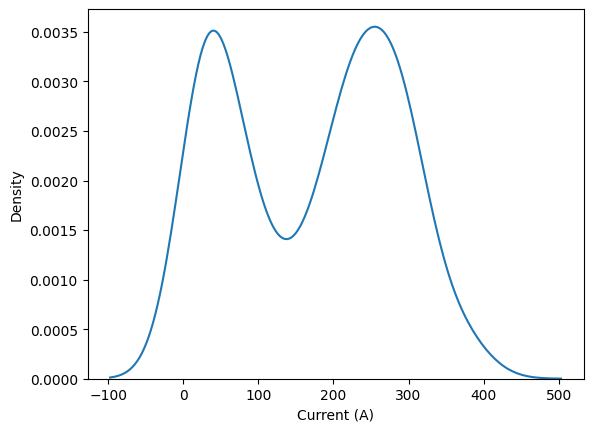

In [49]:
sns.kdeplot(data =df, x = 'Current (A)')

<Axes: xlabel='Voltage(V)', ylabel='Density'>

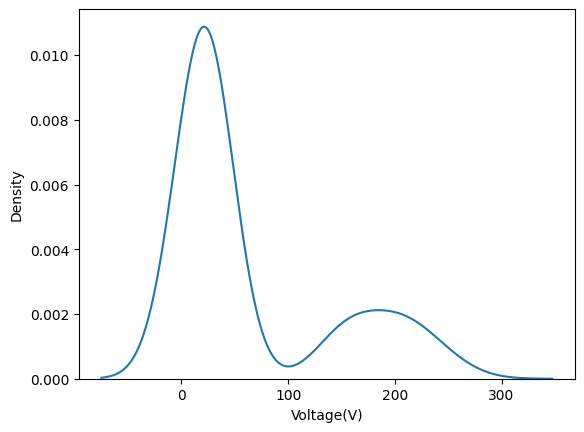

In [50]:
sns.kdeplot(data =df, x = 'Voltage(V)')

<Axes: xlabel='Wire feed spped(m/min)', ylabel='Density'>

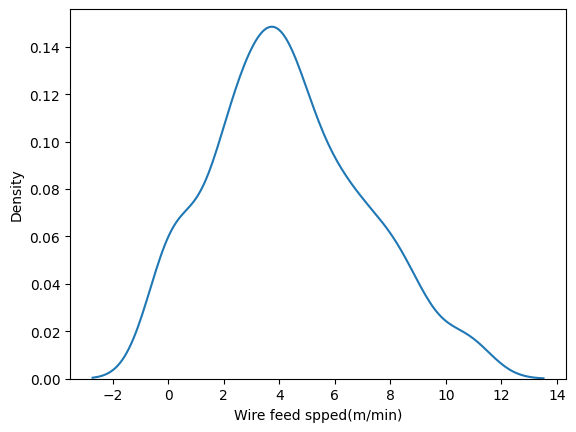

In [51]:
sns.kdeplot(data =df, x = 'Wire feed spped(m/min)')

<Axes: xlabel='Bead width(mm)', ylabel='Density'>

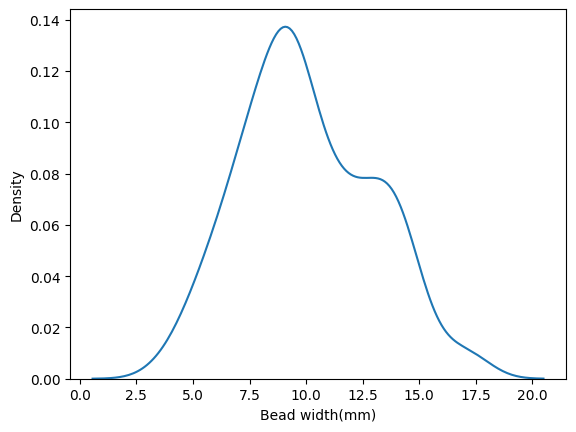

In [52]:
sns.kdeplot(data =df, x = 'Bead width(mm)')

<Axes: xlabel='Bead Height (mm)', ylabel='Density'>

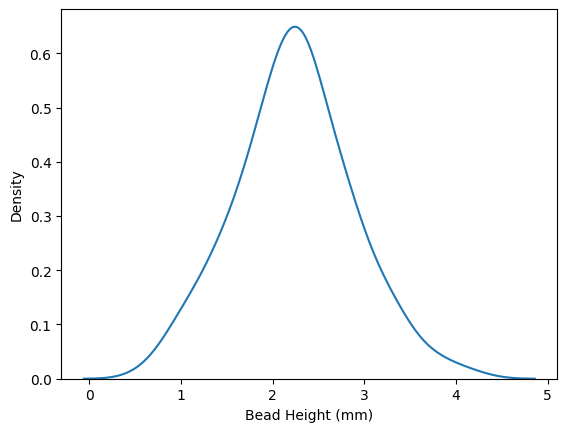

In [53]:
sns.kdeplot(data =df, x = 'Bead Height (mm)')

<Axes: xlabel='Bead Penetration(mm)', ylabel='Density'>

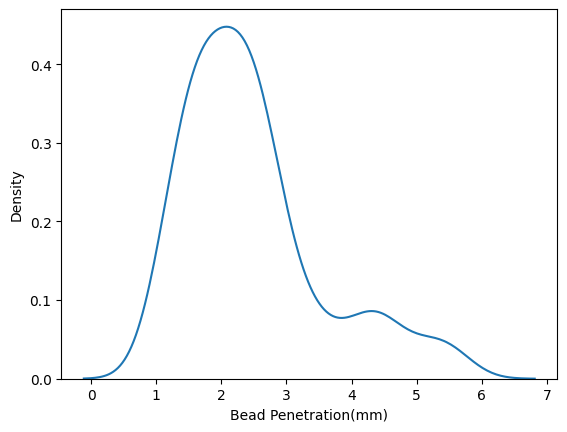

In [54]:
sns.kdeplot(data =df, x = 'Bead Penetration(mm)')

<Axes: xlabel='Material', ylabel='Density'>

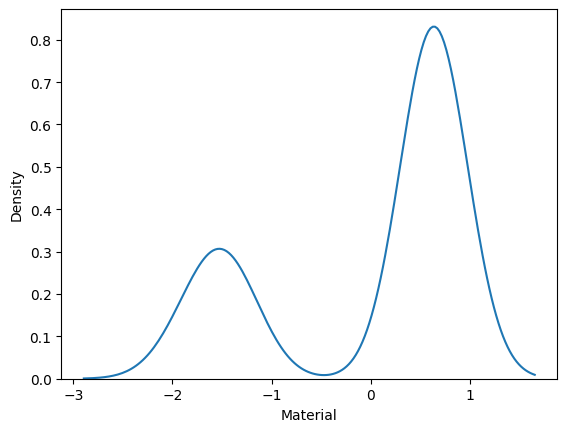

In [55]:
sns.kdeplot(data =x, x = 'Material')

<Axes: xlabel='Current (A)', ylabel='Density'>

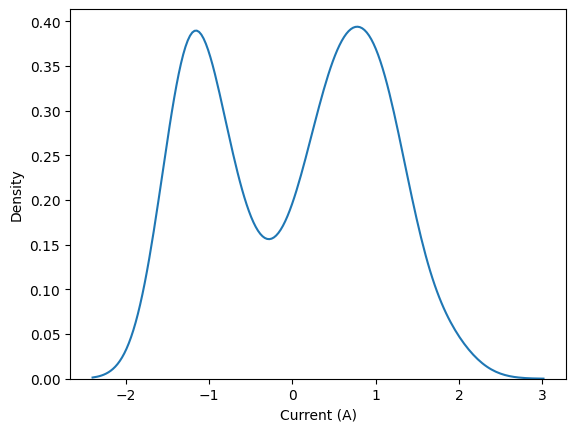

In [56]:
sns.kdeplot(data =x, x = 'Current (A)')

<Axes: xlabel='Voltage(V)', ylabel='Density'>

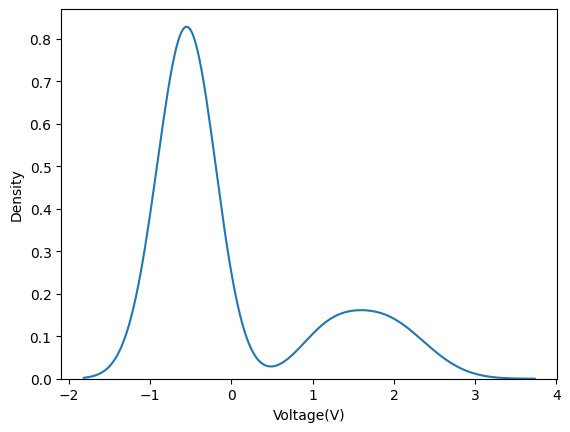

In [57]:
sns.kdeplot(data =x, x = 'Voltage(V)')

<Axes: xlabel='Wire feed spped(m/min)', ylabel='Density'>

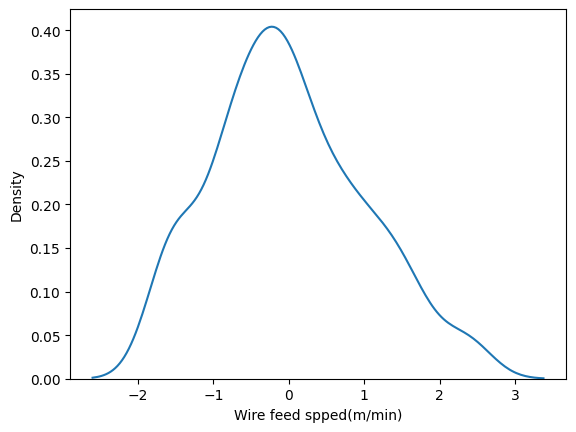

In [58]:
sns.kdeplot(data =x, x = 'Wire feed spped(m/min)')

In [59]:
xtr,xte,ytr,yte = train_test_split(x,y,test_size=0.2,random_state=1)
sc =StandardScaler()
xtr = sc.fit_transform(xtr)
xte=sc.transform(xte)

In [60]:
class ann():
  def ann_model(no_of_neurons,input_shape,no_of_outputs,x_train, y_train,x_test,y_test):
    reg =Sequential()
    reg.add(Dense(no_of_neurons,input_shape=(input_shape,),activation='LeakyReLU'))
    reg.add(Dense(units=no_of_neurons,activation='LeakyReLU'))
    reg.add(Dense(units=no_of_neurons,activation='LeakyReLU'))
    reg.add(Dense(units=no_of_neurons,activation='LeakyReLU'))
    reg.add(Dense(no_of_outputs))
    reg.compile(optimizer = 'adam',loss = 'mean_squared_error',metrics=['mean_squared_error'])

    opt = tf.keras.optimizers.Adam(learning_rate = 0.01)

    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor = 'mean_squared_error',
        min_delta = 0.0001,
        patience = 40,
        verbose = 1,
        mode ='auto',
        baseline = None,
        restore_best_weights = False)
    
    model_history = reg.fit(x_train, y_train,validation_data = (x_test,y_test),batch_size = 10, epochs = 400,callbacks = early_stopping)

    
    return reg,early_stopping
    
  
  def train_and_predict(ann_seq_model,x_test):
    y_pred = ann_seq_model.predict(x_test)
    return y_pred

  def performance(y_pred,y_test):
    mae = mean_absolute_error(y_test,y_pred)
    cm = r2_score(y_test,y_pred)
    mse=mean_squared_error(y_test,y_pred)
  
    return mae,cm,mse

In [62]:
ann_seq_model,es = ann.ann_model(no_of_neurons=89,input_shape=4,no_of_outputs=3,x_train=xtr, y_train=ytr,x_test=xte,y_test=yte)
y_predicted = ann.train_and_predict(ann_seq_model=ann_seq_model,x_test=xte)
mae,_,_= ann.performance(y_predicted,yte)
mae_o=0
diff=abs(mae_o-mae)
while diff>=0.01:
  ann_seq_model,es = ann.ann_model(no_of_neurons=89,input_shape=4,no_of_outputs=3,x_train=xtr, y_train=ytr,x_test=xte,y_test=yte)
  y_predicted = ann.train_and_predict(ann_seq_model=ann_seq_model,x_test=xte)
  mae,cm,mse= ann.performance(y_predicted,yte)
  diff=abs(mae_o-mae)
  mae_o=mae
  print(mae_o)
  print(cm)
  print(mse)

Epoch 1/400
18/18 [==============================] - 1s 14ms/step - loss: 34.3507 - mean_squared_error: 34.3507 - val_loss: 17.1756 - val_mean_squared_error: 17.1756
Epoch 2/400
18/18 [==============================] - 0s 5ms/step - loss: 9.7876 - mean_squared_error: 9.7876 - val_loss: 3.6777 - val_mean_squared_error: 3.6777
Epoch 3/400
18/18 [==============================] - 0s 5ms/step - loss: 2.4526 - mean_squared_error: 2.4526 - val_loss: 2.0829 - val_mean_squared_error: 2.0829
Epoch 4/400
18/18 [==============================] - 0s 5ms/step - loss: 2.0046 - mean_squared_error: 2.0046 - val_loss: 1.9442 - val_mean_squared_error: 1.9442
Epoch 5/400
18/18 [==============================] - 0s 4ms/step - loss: 1.8952 - mean_squared_error: 1.8952 - val_loss: 1.9594 - val_mean_squared_error: 1.9594
Epoch 6/400
18/18 [==============================] - 0s 4ms/step - loss: 1.8217 - mean_squared_error: 1.8217 - val_loss: 1.8827 - val_mean_squared_error: 1.8827
Epoch 7/400
18/18 [==========

2/2 [==============================] - 0s 8ms/step
0.6447488215552435
0.583149610719079
1.1397301808679483
Epoch 1/400
18/18 [==============================] - 1s 14ms/step - loss: 37.5087 - mean_squared_error: 37.5087 - val_loss: 23.1641 - val_mean_squared_error: 23.1641
Epoch 2/400
18/18 [==============================] - 0s 5ms/step - loss: 13.5850 - mean_squared_error: 13.5850 - val_loss: 4.1196 - val_mean_squared_error: 4.1196
Epoch 3/400
18/18 [==============================] - 0s 6ms/step - loss: 3.3780 - mean_squared_error: 3.3780 - val_loss: 2.1934 - val_mean_squared_error: 2.1934
Epoch 4/400
18/18 [==============================] - 0s 6ms/step - loss: 2.2607 - mean_squared_error: 2.2607 - val_loss: 1.9980 - val_mean_squared_error: 1.9980
Epoch 5/400
18/18 [==============================] - 0s 5ms/step - loss: 2.0229 - mean_squared_error: 2.0229 - val_loss: 1.8641 - val_mean_squared_error: 1.8641
Epoch 6/400
18/18 [==============================] - 0s 5ms/step - loss: 1.7843 -

Streaming output truncated to the last 5000 lines.
18/18 [==============================] - 0s 8ms/step - loss: 0.8567 - mean_squared_error: 0.8567 - val_loss: 1.3728 - val_mean_squared_error: 1.3728
Epoch 87/400
18/18 [==============================] - 0s 7ms/step - loss: 0.9842 - mean_squared_error: 0.9842 - val_loss: 1.2868 - val_mean_squared_error: 1.2868
Epoch 88/400
18/18 [==============================] - 0s 7ms/step - loss: 0.9038 - mean_squared_error: 0.9038 - val_loss: 1.3370 - val_mean_squared_error: 1.3370
Epoch 89/400
18/18 [==============================] - 0s 7ms/step - loss: 0.9243 - mean_squared_error: 0.9243 - val_loss: 1.3691 - val_mean_squared_error: 1.3691
Epoch 90/400
18/18 [==============================] - 0s 8ms/step - loss: 1.0844 - mean_squared_error: 1.0844 - val_loss: 1.2268 - val_mean_squared_error: 1.2268
Epoch 91/400
18/18 [==============================] - 0s 7ms/step - loss: 1.0350 - mean_squared_error: 1.0350 - val_loss: 1.1951 - val_mean_squared_erro

In [63]:
df['step_over_dist(mm)'] = (2/3)*df['Bead width(mm)']

In [64]:
df.to_csv('Bead_geometry.csv')

In [65]:
mae_o

0.6101727731068928